In [251]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [252]:
import numpy as np
import pandas as pd
from datetime import date
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [253]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [254]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [255]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [256]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [257]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [258]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [259]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent)


('2017-08-23',)


In [260]:
# Convert to datetime format
most_recent_date = dt.date(2017,8,23)
print(most_recent_date)

2017-08-23


In [261]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

In [262]:
# Join Measurement & Station tables
session.query(Measurement.station, Station.station)
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station)

In [263]:
# Calculate date one year ago
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [264]:
# Perform a query to retrieve the data and precipitation scores
select_last_year = [
                Measurement.date,
                Measurement.prcp
                ]
year_precipitation = session.query(*select_last_year).\
    filter(Measurement.date <= most_recent_date).\
    filter(Measurement.date >= last_year)


In [265]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(year_precipitation)
df_precipitation.set_index("date", inplace=True)
df_precipitation

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [266]:
# Sort by Date
df_precip_sorted = df_precipitation.sort_values(by="date")
df_precip_sorted

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [267]:
# Rename column heading
df_precip_renamed = df_precip_sorted.rename(columns={"date": "date", "prcp": "precipitation"})
df_precip_renamed

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


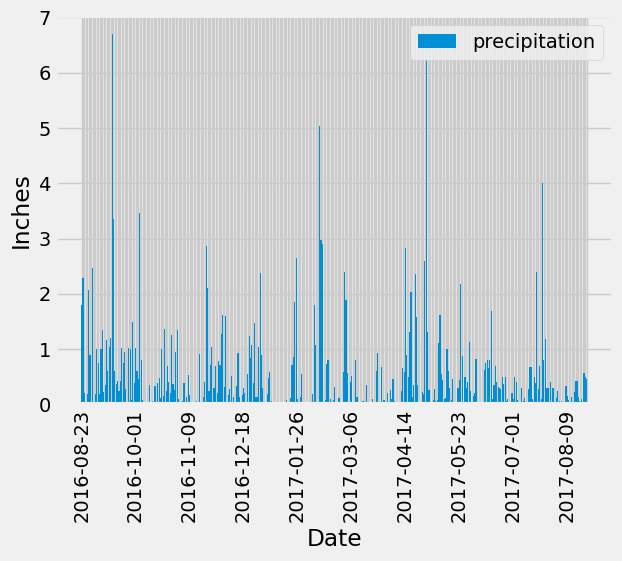

In [268]:
#Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df_precip_renamed.index, df_precip_renamed["precipitation"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)

ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::39]))
for label in temp:
    label.set_visible(False)

precip_patch = mpatches.Patch(label="precipitation")
plt.legend(handles=[precip_patch])

plt.show()

# Stackoverflow solution used to assist in this bar chart
# https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar

In [269]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precip_renamed.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [270]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).distinct().count()
print(station_count)

9


In [271]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_activity = session.query(
                        Measurement.station,
                        func.count(Measurement.station)
                        ).group_by(Measurement.station
                        ).order_by(func.count (Measurement.station).desc())

for station in station_activity:
    print(station)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [272]:
# Which station id has the highest activity?
## USC00519281 with 2772

In [273]:
# Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station
# found in the previous query.

most_active_station = session.query(
                            Measurement.station,
                            func.min(Measurement.tobs),
                            func.max(Measurement.tobs),
                            func.avg(Measurement.tobs)
                            ).filter(Measurement.station == "USC00519281").all()

print(most_active_station)

print(f"The most active station is: {most_active_station[0][0]}")
print(f"The lowest temperature at this station was: {most_active_station[0][1]}")
print(f"The highest temperature at this station was: {most_active_station[0][2]}")
print(f"The average temperature at this station was: {round(most_active_station[0][3],1)}")

[('USC00519281', 54.0, 85.0, 71.66378066378067)]
The most active station is: USC00519281
The lowest temperature at this station was: 54.0
The highest temperature at this station was: 85.0
The average temperature at this station was: 71.7


In [274]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_tobs = [Measurement.tobs]

most_active_station_query = session.query(*most_active_station_tobs).\
                            filter(Measurement.date <= most_recent_date).\
                            filter(Measurement.date >= last_year).\
                            filter(Measurement.station == "USC00519281").all()



In [275]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_most_active_station = pd.DataFrame(most_active_station_query)
print(df_most_active_station)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

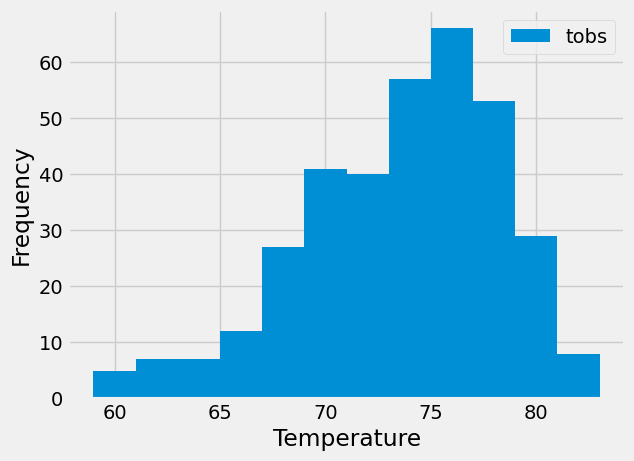

In [276]:
df_most_active_station.plot(kind='hist',
                            bins=12,
                            legend="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show

# Close session

In [277]:
# Close Session
session.close()